<a href="https://colab.research.google.com/github/jinsooya/LN/blob/main/08_langchain-rag-overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

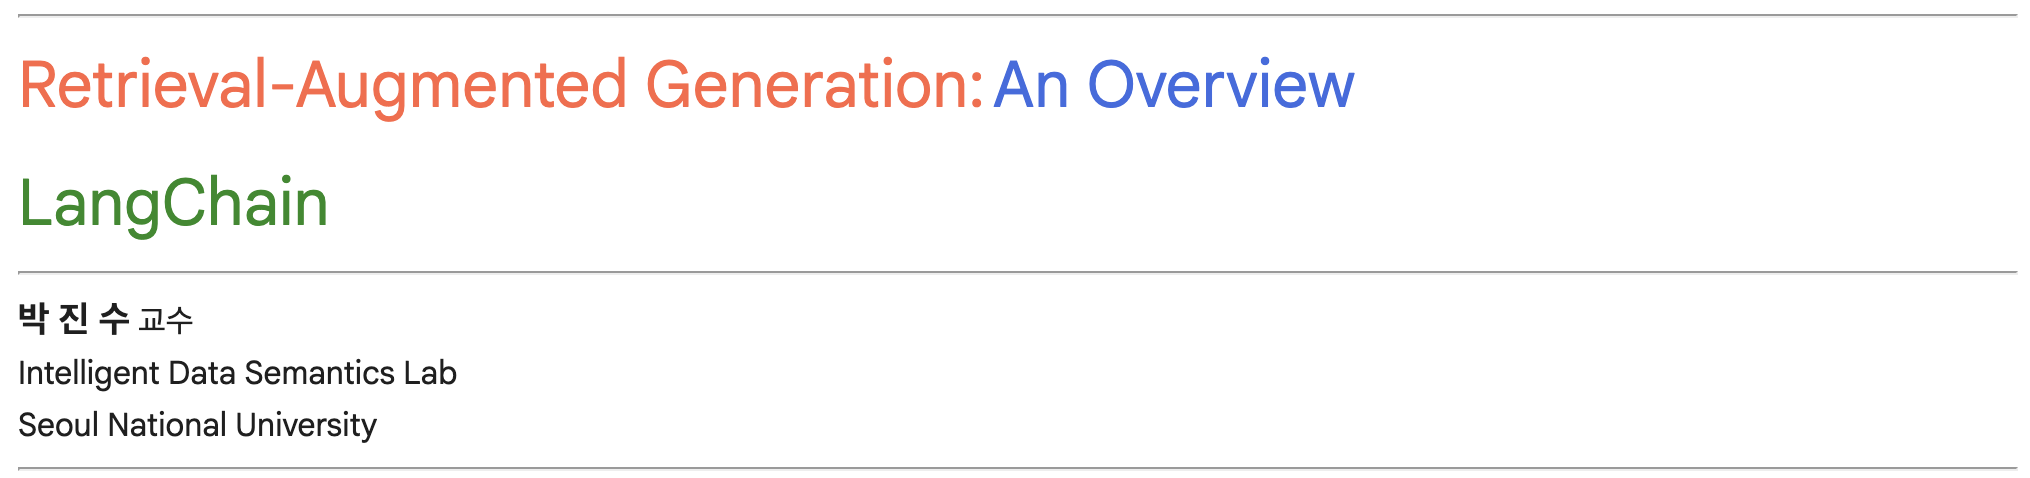

- - -    

- 본 자료는 강의를 위한 목적으로 제작되었습니다.
- 본 자료에 대한 사전 허가를 받지 않는 배포를 금지합니다.
- 본 자료를 강의나 다른 목적으로 활용하고자 하시는 경우 꼭 아래 이메일 주소로 연락주세요.
- 연락처 : [jinsoo@snu.ac.kr](jinsoo@snu.ac.kr)

- - -

**<font size='+2'>목차**

>[패키지 설치 및 API 설정](#scrollTo=TcA9OFpYr5Ys)

>>[Setting Up the MistralAI API](#scrollTo=p1YmqIgtgYpK)

>>[Setting Up the Groq API](#scrollTo=F-eMvvKEgYpL)

>>[Setting Up the Google API](#scrollTo=OLZyjGUVgYpL)

>>[Setting Up the Anthropic API](#scrollTo=9_ESx0XEgYpP)

>>[Setting Up the OpenAI API](#scrollTo=H5CXeJ2ogYpP)

>[실습용 파일 가져오기](#scrollTo=MuRWKjl3R--2)

>[도우미 함수](#scrollTo=gdzvu749qPfV)

>[인덱싱(indexing)](#scrollTo=traHeq6-dJWP)

>>[문서 로딩(document loading)](#scrollTo=WJIhCmZco4ir)

>>[문서 분할(chunking)](#scrollTo=afYpXW5WeN4W)

>>[문서 저장(storage)](#scrollTo=DgWNccZIo4is)

>>>[임베딩(embeddings)](#scrollTo=cFe9vqxnfdOz)

>>>[벡터 저장소(vectorstores)](#scrollTo=UuoBEF-3o4it)

>>>>[(1) 미리 생성한 벡터 저장소 내려받기 (권장)](#scrollTo=DiQr3BP_Y1ev)

>>>>[(2) 본인이 직접 생성하고 관리](#scrollTo=PYNPO3HZrBYN)

>[검색/추출(retrieval)](#scrollTo=9wEDExSUjtmQ)

>>[Similarity Search](#scrollTo=BzBmwKLYpYc1)

>>[Similarity Search with Score](#scrollTo=4Fuh1LVhp4IG)

>>[Max Marginal Relevance](#scrollTo=Kmt-WjRhtWl1)

>[생성(generation)](#scrollTo=G7xWywbTaUlz)

>>[LangChain 구성](#scrollTo=XwKg0zWSF31R)

>>>[단일 문서 질의](#scrollTo=PuNasYzV5N8j)

>>>[여러 문서 비교 및 대조](#scrollTo=pUvmhzpK5T8I)

>>[RAG의 잠재적 문제](#scrollTo=GPWVjB2Dwq5Y)

>>[LangGraph 구성](#scrollTo=6jieSvpG0pjL)

>>>[모델 및 파라미터 설정](#scrollTo=aalzn13Q0562)

>>>[시스템 프롬프트](#scrollTo=DnyAwIH807_r)

>>>[데이터 스키마 정의](#scrollTo=gkfGjDbD1BEt)

>>>[그래프 상태 정의](#scrollTo=7ncElXFT1CPM)

>>>[노드 정의](#scrollTo=qXuOd6BA1HvW)

>>>>[검색 및 추출 노드](#scrollTo=BREhuwkfzRiB)

>>>>[문서 심사 노드](#scrollTo=CrTxnuLezwWN)

>>>>[답변 생성 노드](#scrollTo=hM2jntNJz2Cc)

>>>[그래프 흐름 정의](#scrollTo=H0pWejU-1RwY)

>>>[단일 문서 질의](#scrollTo=qFyL0hUs6GXA)

>>>[여러 문서 비교 및 대조](#scrollTo=TYyVc6ci6GXC)

>>[Better Approach – Left as an Exercise](#scrollTo=44S4R5E5QaZi)



# 패키지 설치 및 API 설정

In [ ]:
%%capture --no-stderr
!python -m pip install pypdf langgraph langchain langchain-community langchain-text-splitters langchain-chroma 'langchain[mistralai]' 'langchain[groq]' 'langchain[google-genai]' 'langchain[anthropic]' 'langchain[openai]'

## Setting Up the MistralAI API

**<font size='+1'>MistralAI API Key 발급</font>**
- API Key 발급 및 MistralAI에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1eiRVg-hTGhN2SrJz0R7Qsn0ZS6Pw7HHd/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'MISTRAL_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['MISTRAL_API_KEY'] = userdata.get('MISTRAL_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
from google.colab import userdata
os.environ['MISTRAL_API_KEY'] = getpass.getpass('Enter Your MistralAI API Key: ')

## Setting Up the Groq API

**<font size='+1'>Groq API Key 발급</font>**
- API Key 발급 및 Groq에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1E267hPCwahSbaKWVeCPQp2ksW8T9VsTG/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'GROQ_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['GROQ_API_KEY'] = getpass.getpass('Enter Your Groq API Key: ')

## Setting Up the Google API

**<font size='+1'>Google Gemini API Key 발급</font>**
- API Key 발급 및 Google Gemini 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1YLy4B4RkD6Y3HnpScpKd0trPZxKvUsXa/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'GOOGLE_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['GEMINI_API_KEY'] = userdata.get('GOOGLE_API_KEY')
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['GEMINI_API_KEY'] = os.environ['GOOGLE_API_KEY'] = getpass.getpass('Enter Your Google Gemini API Key: ')

## Setting Up the Anthropic API

**<font size='+1'>Anthropic API Key 발급</font>**
- API Key 발급 및 Anthropic 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1u9q-0_gCc6wmRAXNctQj8ApLRhOtYYpX/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'ANTHROPIC_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['ANTHROPIC_API_KEY'] = userdata.get('ANTHROPIC_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['ANTHROPIC_API_KEY'] = getpass.getpass('Enter Your Anthropic API Key: ')

## Setting Up the OpenAI API

**<font size='+1'>OpenAI API Key 발급</font>**
- API Key 발급 및 OpenAI에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/122mEaoTYAYOPehBfChfOkNLHbZrDge3C/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'OPENAI_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('Enter Your OpenAI API Key: ')

# 실습용 파일 가져오기

In [ ]:
!gdown 1fDGjEmV-gLdE9hp-SyFegLTqZ0gJhb-5 -O apple-10k-2024.pdf
!gdown 1rcnxJd3aNjeFez8GgEbiLuVfXTCSkyaA -O google-10k-2024.pdf
!gdown 171_5-KiXxpmki9E_Pdjkllz4avdTDq0C -O uber-10k-2024.pdf
!gdown 1-_yUKervbHHy-pHL7o-ntbr3ZQ5BS23y -O lyft-10k-2024.pdf

# 도우미 함수

In [ ]:
# Colab의 출력 결과를 자동으로 줄바꿈한다.
from IPython.display import HTML, display

def set_css():
    display(HTML('''
    <style>
        pre {
            white-space: pre-wrap;
        }
    </style>
    '''))

get_ipython().events.register('pre_run_cell', set_css)

# 인덱싱(indexing)

- - -
**인덱싱(indexing)**
- 데이터 소스에서 데이터를 취득하고 색인화하는 과정
- - -

## 문서 로딩(document loading)

In [ ]:
# --- Load PDF files
from langchain_community.document_loaders import PyPDFLoader

# list of PDF files to load
files = [
    'apple-10k-2024.pdf',   # 79 pages
    'google-10k-2024.pdf',  # 99 pages
    'uber-10k-2024.pdf',    # 156 pages
    'lyft-10k-2024.pdf'     # 168 pages
]

# create loaders for each PDF file
loaders = [PyPDFLoader(file) for file in files]

# load pages from all documents
pages = [_pages for loader in loaders for _pages in loader.load()]
print(len(pages))

## 문서 분할(chunking)

- - -
문서 분할(chunking) 과정에서는
- 각 청크의 크기(**chunk_size**)가 너무 크면 응답 생성 시간이 지연되며, 너무 작으면 중요 정보를 포함하지 않아 검색하지 못하고 놓칠 수 있다.
- 각 청크의 내용이 전후 청크의 내용과 겹치는 정도(**chunk_overlap**)가 검색기(retriever) 성능에 영향을 미칠 수 있다.
- - -

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=500
)
splits = recursive_splitter.split_documents(pages)
print(len(splits))

## 문서 저장(storage)

### 임베딩(embeddings)

- - -
- 임베딩 벡터는 문장의 내용이 뜻하는 것을 수치화하여 기계가 이해할 수 있도록 하는 고차원 공간의 숫자 배열이다.
- 비슷한 내용의 텍스트는 비슷한 벡터를 갖는다.
- 임베딩 벡터로 표현한 정보를 저장하려면 벡터 저장소를 사용한다.
- - -

In [ ]:
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

In [ ]:
sentence1 = '나는 강아지를 좋아합니다.'
sentence2 = '나는 고양이를 좋아합니다.'
sentence3 = '나는 드럼을 좋아합니다.'

In [ ]:
embedding1 = embeddings.embed_query(sentence1)
embedding2 = embeddings.embed_query(sentence2)
embedding3 = embeddings.embed_query(sentence3)

In [ ]:
print(len(embedding1), len(embedding2), len(embedding3))

In [ ]:
print(embedding1[:10])
print(embedding2[:10])
print(embedding3[:10])

In [ ]:
import numpy

def cosine_similarity(v1, v2):
    dot_product = numpy.dot(v1, v2)
    norm_v1 = numpy.linalg.norm(v1)
    norm_v2 = numpy.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

print(cosine_similarity(embedding1, embedding2))
print(cosine_similarity(embedding1, embedding3))
print(cosine_similarity(embedding2, embedding3))

In [ ]:
# 한글 폰트를 설치한다.
import gdown
from matplotlib import pyplot
import matplotlib.font_manager as fm

!gdown 1FnifWn2tN8QZMEJVfsAOzoSa40QRfISm -O NanumGothic.ttf

# 나눔고딕(NanumGothic)을 사용하기 위해 경로를 포함시킨다.
fontpath = '/content/NanumGothic.ttf'
fm.fontManager.addfont(fontpath)
pyplot.rcParams['font.family'] = 'NanumGothic'
pyplot.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas, seaborn

df = pandas.DataFrame([embedding1, embedding2, embedding3], index=[sentence1, sentence2, sentence3])
sim = df @ df.T
seaborn.heatmap(sim, vmin=0, vmax=1, cmap='Greens')

### 벡터 저장소(vectorstores)

- - -
**벡터 저장소(vectorstore)**
- 데이터를 벡터 형식으로 저장하고 검색할 수 있는 데이터베이스
- 빠른 인덱싱과 검색
    + 고차원 데이터의 효율적 인덱싱으로 빠른 검색 속도를 제공한다.
    + 대규모 데이터에서 유사 항목을 신속하게 찾을 수 있다.
- 고차원 데이터 처리
    + 복잡한 데이터 구조를 효과적으로 관리할 수 있다.
- 다양한 데이터 형식 지원
    + 텍스트, 이미지, 오디오 등 다양한 형식의 데이터 벡터화가 가능하다.
- - -

**<font color='red'>아래 둘 중 <u>하나만 선택</u>해야 합니다.</font>**
- **(1) 미리 생성한 벡터 저장소 내려받기 <font color='red'>(권장)</font>**
- **(2) 본인이 직접 생성하고 관리**


#### **(1) 미리 생성한 벡터 저장소 내려받기 <font color='red'>(권장)</font>**

**NOTE:** OpenAI와 Gemini 모두 Embedding API에 Free Tier가 존재하여, 무료 API Key 사용자도 사용 가능하다.

**<font color='green'>아래 둘 중 <u>하나만 선택</u>해야 합니다.</font>**
- **(1-1) OpenAI 임베딩 모델 사용**
- **(1-2) Gemini 임베딩 모델 사용**

**<font color='green'>(1-1) OpenAI 임베딩 모델 사용</font>**

OpenAI API를 유료 결제하지 않은 무료 사용자도 아래 사용 한도 내에서 벡터 저장소에 쿼리를 요청할 수 있다.

OpenAI 임베딩 모델을 이용해서 벡터 스토어에 쿼리를 요청하는 경우 무료 이용자의 Embedding API 사용 한도는 아래와 같다. (출처: https://platform.openai.com/docs/models/text-embedding-3-large)

<table>
<tr><td>RPM(Request per Minute)</td><td>100 회</td></tr>
<tr><td>TPM(Tokens per Minute)</td><td>40,000 토큰</td></tr>
<tr><td>RPD(Request per Day)</td><td>2,000 회</td></tr>
</table>

무료로 **1분에 100회까지 벡터 스토어에 질의**할 수 있다.

- - -

**참고:** Tier 1 이상 유료 사용자의 사용 한도는 아래와 같다.

<table>
<tr><td>RPM(Request per Minute)</td><td>3,000 회</td></tr>
<tr><td>TPM(Tokens per Minute)</td><td>1,000,000 토큰</td></tr>
<tr><td>RPD(Request per Day)</td><td>무제한</td></tr>
</table>

- - -

**참고:** Tier 1 이상 유료 사용자가 OpenAI Embedding을 이용해서 벡터 스토어에 쿼리를 요청하는 경우 API 사용료는 아래와 같다 (출처: https://platform.openai.com/docs/pricing#embeddings)


<table>
<tr><td><b>text-embedding-3-large</b></td><td>1M 토큰 당 $0.13</td></tr>
</table>

- 짧은 질의가 30~50토큰 정도인 것을 고려했을 때, **1회 질의에는 약 \$0.0000039 ~ $0.0000065 소모**

- - -

In [ ]:
!gdown --folder 1OAay3GMMIxMJ27X6KxAuwzRl4be5v5G9 -O 10k-2024-openai

In [ ]:
# --- loading from the vectorstore
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

# load from the vecorstore
path = '10k-2024-openai'
vectorstore = Chroma(
    collection_name='10k-2024',
    embedding_function=embeddings,
    collection_metadata={'hnsw:space': 'cosine'},
    persist_directory=path
)
vectorstore._collection.count()

**<font color='green'>(1-2) Gemini 임베딩 모델 사용</font>**

Gemini API를 유료 결제하지 않은 무료 사용자도 아래 사용 한도 내에서 벡터 저장소에 쿼리를 요청할 수 있다.

Gemini 임베딩 모델을 이용해서 벡터 스토어에 쿼리를 요청하는 경우 무료 이용자의 Embedding API 사용 한도는 아래와 같다. (출처: https://ai.google.dev/gemini-api/docs/rate-limits#free-tier)

<table>
<tr><td>RPM(Request per Minute)</td><td>100 회</td></tr>
<tr><td>TPM(Tokens per Minute)</td><td>30,000 토큰</td></tr>
<tr><td>RPD(Request per Day)</td><td>1,000 회</td></tr>
</table>

무료로 **1분에 100회까지 벡터 스토어에 질의**할 수 있다.

- - -

**참고:** Tier 1 이상 유료 사용자의 사용 한도는 아래와 같다.

<table>
<tr><td>RPM(Request per Minute)</td><td>3,000 회</td></tr>
<tr><td>TPM(Tokens per Minute)</td><td>1,000,000 토큰</td></tr>
<tr><td>RPD(Request per Day)</td><td>무제한</td></tr>
</table>

- - -

**참고:** Tier 1 이상 유료 사용자가 Gemini Embedding을 이용해서 벡터 스토어에 쿼리를 요청하는 경우 API 사용료는 아래와 같다 (출처: https://ai.google.dev/gemini-api/docs/pricing#gemini-embedding)


<table>
<tr><td><b>gemini-embedding-001</b></td><td>1M 토큰 당 $0.15</td></tr>
</table>

- 짧은 질의가 30~50토큰 정도인 것을 고려했을 때, **1회 질의에는 약 \$0.0000045 ~ $0.0000075 소모**

- - -

In [ ]:
!gdown --folder 1hzCPdd6n04LZz4l0iprr4xz0P5L9aaKX -O 10k-2024-gemini

In [ ]:
# --- loading from the vectorstore
from langchain_chroma import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

gemini_embeddings = GoogleGenerativeAIEmbeddings(model='gemini-embedding-001')

# load from the vecorstore
path = '10k-2024-gemini'
vectorstore = Chroma(
    collection_name='10k-2024',
    embedding_function=gemini_embeddings,
    collection_metadata={'hnsw:space': 'cosine'},
    persist_directory=path
)
vectorstore._collection.count()

#### **(2) 본인이 직접 생성하고 관리**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# --- saving the vectorstore
from langchain_chroma import Chroma

path = '/content/drive/MyDrive/vectorstores/10k'
vectorstore = Chroma.from_documents(
    documents=splits,
    embedding=embeddings,
    collection_name='10k-2024',
    collection_metadata={'hnsw:space': 'cosine'},
    persist_directory=path
)
vectorstore._collection.count()

In [ ]:
# %%% 저장한 vectorstore를 로딩할 때만 실행한다 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# --- loading from the vectorstore
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

# load from the vecorstore
path = '/content/drive/MyDrive/vectorstores/10k'
vectorstore = Chroma(
    collection_name='10k-2024',
    embedding_function=embeddings,
    collection_metadata={'hnsw:space': 'cosine'},
    persist_directory=path
)
vectorstore._collection.count()

# 검색/추출(retrieval)

## Similarity Search

- - -
**유사성 검색(similarity search)**
- 질의(query) 벡터와 벡터 저장소에 저장된 벡터의 유사성을 기준으로 검색하는 방식이다.
- - -

In [ ]:
question = '2024년 Apple의 순이익은 얼마입니까?'

retrieved_docs = vectorstore.similarity_search(question)  # default k=4
print(len(retrieved_docs))

In [ ]:
retrieved_docs

## Similarity Search with Score

- - -
반환한 거리 점수는 코사인 거리다. 따라서 점수가 낮을수록 좋다.

**코사인 거리(cosine distance)**
- 두 벡터 간의 방향 차이를 측정하는 방법으로 벡터 간의 각도를 이용하여 유사성을 계산한다.
- 값의 범위:
    + **0**: 완전히 동일
    + **2**: 완전히 반대
- 수식 : $\text{cosine distance} = 1 - \text{cosine similarity}$
- [참고] **코사인 유사도(cosine similarity**): 두 벡터 간의 코사인 각도를 기반으로 유사성을 측정
    + **-1**: 완전히 반대
    + **1**: 완전히 동일

- - -

In [ ]:
question = '2024년 Apple의 순이익은 얼마입니까?'

retrieved_docs = vectorstore.similarity_search_with_score(question)  # default k=4
retrieved_docs

## Max Marginal Relevance

- - -
**최대 한계 관련성(maximal marginal relevance, MMR)** 검색
- 질의(query) 벡터와 유사한 벡터를 선택하면서 동시에 이미 선택한 문서와 지나치게 유사한 문서에 불이익을 부여(penalizing)하여 유사성과 다양성을 동시에 확보하는 검색 방식이다.
- 즉, 중복을 최소화하면서 관련성을 최대화하는 검색 기법으로 다중 유사한 결과를 피하고 다양한 결과를 제공한다.
- 장점
    + 관련성과 다양성을 동시에 고려하기 때문에 중복을 최소화하면서도 다양한 결과를 제공하여 사용자 경험을 향상시킬 수 있다.
    + 동일한 결과가 반복되지 않아 더 많은 정보를 얻을 수 있다.
- 단점
    + 가중치 값에 따라 관련성과 다양성 간의 균형이 달라지며, 최적의 값을 찾기 어려울 수 있다.
    + 모든 문서 간의 유사도를 계산해야 하므로 계산 비용이 높아질 수 있기 때문에 대규모 데이터셋에서는 실시간 처리에 어려움이 있을 수 있다.
    + 입력 데이터의 품질이 낮으면, 즉 잘못된 또는 노이즈가 많은 데이터가 포함된 경우 MMR의 성능도 저하될 수 있기 때문에 비효율적인 결과가 나올 수 있다.
- - -

In [ ]:
# --- MMR search
question = '2024년 Apple의 순이익은 얼마입니까?'

retrieved_docs = vectorstore.max_marginal_relevance_search(question)  # default k=4, fetch_k=20
print(len(retrieved_docs))
retrieved_docs

# 생성(generation)

## LangChain 구성

In [ ]:
# --- 모델 및 파라미터 설정
from langchain.chat_models import init_chat_model

# 본인이 사용하는 모델(model)로 도우미 함수를 설정하세요.
# 예시) 'mistralai:mistral-small-latest', 'mistralai:mistral-large-latest'
#      'groq:openai/gpt-oss-20b', 'groq:meta-llama/llama-4-scout-17b-16e-instruct'
#      'google_genai:gemini-2.5-flash', 'google_genai:gemini-2.5-pro'
#      'anthropic:claude-4-sonnet-20250514', 'anthropic:claude-opus-4-1-20250805'
#      'openai:gpt-5-mini', 'openai:gpt-5'
model = init_chat_model('YOUR MODEL OF CHOICE')

In [ ]:
# --- 프롬프트 설정
from langchain import hub
prompt_template = hub.pull('a2i/simple-rag-ko')
prompt_template.pretty_print()

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

# --- 검색기(retriever)
retriever = vectorstore.as_retriever(search_kwargs={'k': 10})

# --- chains
retrieval_chain = create_retrieval_chain(
    retriever=retriever,
    combine_docs_chain=create_stuff_documents_chain(llm=model, prompt=prompt_template)
)
chain = {'input': RunnablePassthrough()} | retrieval_chain

### 단일 문서 질의

In [ ]:
question = '''2024년 Apple의 순이익은 얼마입니까? \
억 달러 단위로 반올림해서 답변하세요.
그리고 참고한 페이지 번호도 알려주세요.
'''
response = chain.invoke(question)
print(response['answer'])

In [ ]:
question = '2023년부터 2024년까지 Uber의 가장 빠르게 성장한 고객 세그먼트를 알려주세요.'
response = chain.invoke(question)
print(response['answer'])

In [ ]:
question = '2023년부터 2024년까지 Apple의 가장 빠르게 성장한 지역을 알려주세요.'
response = chain.invoke(question)
print(response['answer'])

### 여러 문서 비교 및 대조

In [ ]:
question = '2023년부터 2024년까지 Uber와 Lyft의 매출 성장을 비교하세요.'
response = chain.invoke(question)
print(response['answer'])

In [ ]:
question = 'Apple과 Google의 고객 세그먼트를 비교하고 대조 분석하세요.'
response = chain.invoke(question)
print(response['answer'])

In [ ]:
question = '2023년부터 2024년까지 Apple과 Google의 가장 빠르게 성장한 지역을 비교하고 대조 분석하세요.'
response = chain.invoke(question)
print(response['answer'])

 ## RAG의 잠재적 문제

In [ ]:
question = '2024년 가장 핫한 뉴스가 뭔가요?'

retrieved_docs = vectorstore.similarity_search(question)  # default k=4
for doc in retrieved_docs:
    print(f'{doc.metadata['source']} -> {doc.metadata['page_label']} page')

In [ ]:
question = '2024년 Apple의 순이익은 얼마입니까?'

retrieved_docs = vectorstore.similarity_search(question)  # default k=4
for doc in retrieved_docs:
    print(f'{doc.metadata['source']} -> {doc.metadata['page_label']} page')

In [ ]:
question = '세종대왕에 대한 설명을 해주세요.'

retrieved_docs = vectorstore.similarity_search(question)  # default k=4
for doc in retrieved_docs:
    print(f'{doc.metadata['source']} -> {doc.metadata['page_label']} page')

## LangGraph 구성

### 모델 및 파라미터 설정

In [ ]:
# --- 모델 및 파라미터 설정
from langchain.chat_models import init_chat_model

# 본인이 사용하는 모델(model)로 도우미 함수를 설정하세요.
# 예시) 'mistralai:mistral-small-latest', 'mistralai:mistral-large-latest'
#      'groq:openai/gpt-oss-20b', 'groq:meta-llama/llama-4-scout-17b-16e-instruct'
#      'google_genai:gemini-2.5-flash', 'google_genai:gemini-2.5-pro'
#      'anthropic:claude-4-sonnet-20250514', 'anthropic:claude-opus-4-1-20250805'
#      'openai:gpt-5-mini', 'openai:gpt-5'
doc_review_model = init_chat_model('YOUR MODEL OF CHOICE')
answering_model  = init_chat_model('YOUR MODEL OF CHOICE')

### 시스템 프롬프트

In [ ]:
from langchain import hub

hub.pull('a2i/retrieval-reviewer').pretty_print()

In [ ]:
hub.pull('a2i/rag-query-responder').pretty_print()

### 데이터 스키마 정의

In [ ]:
from pydantic import BaseModel, Field
from typing import Literal

class GradeDocument(BaseModel):
    """
    검색한 문서의 적합성을 확인하기 위한 이진 데이터 스키마

    Attributes:
        relevance (Literal['relevant', 'irrelevant']):
            문서가 질문과 관련 있으면 'relevant', 그렇지 않으면 'irrelevant'로 표시
    """
    relevance: Literal['relevant', 'irrelevant'] = Field(
        ...,
        description='Indicates whether the document is relevant to the query: '
                    "'relevant' or 'irrelevant'"
    )

### 그래프 상태 정의

In [ ]:
from langchain.schema import Document
from typing import TypedDict

class State(TypedDict):
    """
    그래프 메시지 상태를 나타내는 클래스

    그래프의 각 노드에서 처리할 입력 데이터와 관련된 상태를 관리한다.

    Attributes:
        question (str): 사용자가 입력한 질문을 저장한다.
        answer (str): 질문에 대한 응답을 저장한다.
        documents (list[Document]): 관련 문서들의 리스트를 저장한다.
    """
    question: str
    answer: str
    documents: list[Document]


### 노드 정의

#### 검색 및 추출 노드

In [ ]:
# --- 검색 및 추출 노드 정의
def retriever_node(state: State) -> State:
    """
    검색 및 문서 추출을 수행하는 노드
    """
    print('\n--- Retriever node -------------------')

    # --- 검색기(retriever)
    retriever = vectorstore.as_retriever(search_kwargs={'k': 10})  # default k=4

    # 현재 그래프 상태에서 질문 데이터를 가져온다.
    question = state['question']

    # 검색 및 추출을 실행한다.
    documents = retriever.invoke(question)

    # 기존 상태에 문서 데이터를 추가하고 반환한다.
    return state | {'documents': documents}

In [ ]:
# >>> (문서와 전혀 무관한 질문) test run <<<
question = '세종대왕에 대한 설명을 해주세요.'
state = retriever_node({'question': question})  # k = 10
for doc in state['documents']:
    print(f'{doc.metadata['source']} -> {doc.metadata['page_label']} page')

In [ ]:
# >>> test run <<<
question = '2024년 Apple의 순이익은 얼마입니까? 억 달러 단위로 반올림해서 답변하세요.'
state = retriever_node({'question': question})  # k = 10
for doc in state['documents']:
    print(f'{doc.metadata['source']} -> {doc.metadata['page_label']} page')

#### 문서 심사 노드

In [ ]:
# --- 추출한 문서를 심사하는 노드 정의
# from langchain import hub

def document_review_node(state: State) -> State:
    """
    추출한 문서의 관련성을 평가하고 필터링하는 메소드
    """
    print('\n--- Document Review node -------------')

    # chain 구성
    chain  = (
        hub.pull('a2i/retrieval-reviewer')
        | doc_review_model.with_structured_output(GradeDocument)
    )

    # 현재 그래프 상태에서 문서 데이터를 가져온다.
    documents = state.get('documents', [])

    # --- evaluate each doc
    relevant_docs = []
    for doc in documents:
        evaluation = chain.invoke(
            input={'question': state['question'], 'documents': doc.page_content}
        )
        grade = evaluation.relevance
        if grade == 'relevant':  # 문서가 관련성이 있으면
            print(f'> Evaluating: DOCUMENT RELEVANT')
            relevant_docs.append(doc)
        else:                    # 문서가 관련성이 없으면
            print(f'> Evaluating: DOCUMENT NOT RELEVANT')
            continue

    return state | {'documents': relevant_docs}

In [ ]:
# >>> test run <<<
# question = '2024년 Apple의 순이익은 얼마입니까? 억 달러 단위로 반올림해서 답변하세요.'
state = document_review_node(state)

In [ ]:
# 문서 심사 에이전트를 통과한 문서
for doc in state['documents']:
    print(f'{doc.metadata['source']} -> {doc.metadata['page_label']} page')

In [ ]:
# >>> (문서와 전혀 무관한 질문) test run <<<
question = '세종대왕에 대한 설명을 해주세요.'
state = retriever_node({'question': question})  # k = 10
state = document_review_node(state)

In [ ]:
state

#### 답변 생성 노드

In [ ]:
# --- 답변 생성 노드 정의
# from langchain import hub

def answer_generation_node(state: State) -> State:
    """
    질문과 문서 컨텍스트를 바탕으로 답변을 생성하는 노드
    """
    print('\n--- Answer Generation node -----------')

    # chain 구성
    chain = (
        hub.pull('a2i/rag-query-responder')
        | answering_model
    )
    # 추출한 문서들을 기반으로 답변을 생성한다.
    generation = chain.invoke(
        input={'documents': state['documents'], 'question': state['question']}
    )

    return state | {'answer': generation}

In [ ]:
# >>> (세종대왕에 대한 설명을 해주세요) test run <<<
state = answer_generation_node(state)

In [ ]:
state

In [ ]:
print(state['answer'].content)

In [ ]:
# >>> test run <<<
question = '2024년 Apple의 순이익은 얼마입니까? 억 달러 단위로 반올림해서 답변하세요.'
state = retriever_node({'question': question})  # k = 10
state = answer_generation_node(state)
print(state['answer'].content)

### 그래프 흐름 정의

In [ ]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)

# --- node
graph.add_node(node='Retriever', action=retriever_node)
graph.add_node('Document Reviewer', document_review_node)
graph.add_node('Answer Generator', answer_generation_node)

# --- edge
graph.add_edge(start_key=START, end_key='Retriever')
graph.add_edge('Retriever', 'Document Reviewer')
graph.add_edge('Document Reviewer', 'Answer Generator')

# --- compile
workflow = graph.compile()

In [ ]:
# --- 그래프 흐름을 보여준다.
import base64
from IPython.display import Image

mermaid = workflow.get_graph().draw_mermaid()
b64 = base64.b64encode(mermaid.encode('utf-8')).decode('ascii')
url = f'https://mermaid.ink/img/{b64}'
Image(url=url)

### 단일 문서 질의

In [ ]:
question = '''2024년 Google의 순이익은 얼마입니까? \
억 달러 단위로 반올림해서 답변하세요. \
그리고 참고한 페이지 번호도 알려주세요.
'''
response = workflow.invoke({'question': question})
print(response['answer'].content)

In [ ]:
question = '2023년부터 2024년까지 Apple의 가장 빠르게 성장한 고객 세그먼트를 알려주세요.'
response = workflow.invoke({'question': question})
print(response['answer'].content)

In [ ]:
question = '2023년부터 2024년까지 Lyft의 가장 빠르게 성장한 지역을 알려주세요.'
response = workflow.invoke({'question': question})
print(response['answer'].content)

### 여러 문서 비교 및 대조

In [ ]:
question = '2023년부터 2024년까지 Apple과 Google의 매출 성장을 비교하세요.'
response = workflow.invoke({'question': question})
print(response['answer'].content)


In [ ]:
question = 'Uber와 Lyft의 고객 세그먼트를 비교하고 대조 분석하세요.'
response = workflow.invoke({'question': question})
print(response['answer'].content)

In [ ]:
question = '2023년부터 2024년까지 Uber와 Lyft의 가장 빠르게 성장한 지역을 비교하고 대조 분석하세요.'
response = workflow.invoke({'question': question})
print(response['answer'].content)

## Better Approach – Left as an Exercise

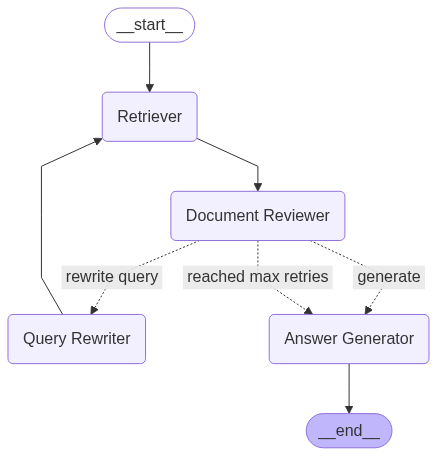

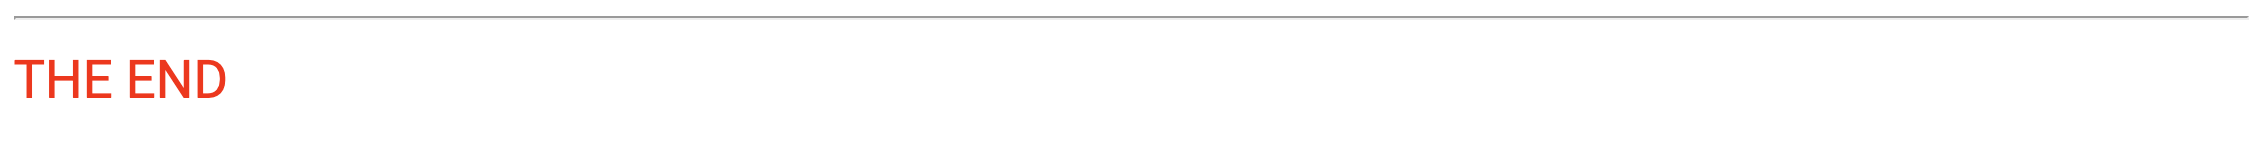